In [ ]:
!pip install face_recognition

In [ ]:
!mkdir known
!wget https://scstylecaster.files.wordpress.com/2019/04/shawn-mendes.jpg -O known/shawn.jpg
!wget https://www.androidred.com/wp-content/uploads/2019/03/Camila-Cabello-Sad-Face.jpg -O known/camila.jpg
!wget https://www.soulbounce.com/wp-content/uploads/2018/06/khalid-stay-2018.jpg -O known/khalid.jpg


mkdir: cannot create directory ‘known’: File exists
--2020-08-11 14:46:13--  https://scstylecaster.files.wordpress.com/2019/04/shawn-mendes.jpg
Resolving scstylecaster.files.wordpress.com (scstylecaster.files.wordpress.com)... 192.0.72.22, 192.0.72.23
Connecting to scstylecaster.files.wordpress.com (scstylecaster.files.wordpress.com)|192.0.72.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338191 (330K) [image/jpeg]
Saving to: ‘known/shawn.jpg’

known/shawn.jpg     100%[===================>] 330.26K  --.-KB/s    in 0.1s    

2020-08-11 14:46:14 (2.35 MB/s) - ‘known/shawn.jpg’ saved [338191/338191]

--2020-08-11 14:46:17--  https://www.androidred.com/wp-content/uploads/2019/03/Camila-Cabello-Sad-Face.jpg
Resolving www.androidred.com (www.androidred.com)... 38.135.32.179
Connecting to www.androidred.com (www.androidred.com)|38.135.32.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 725713 (709K) [image/jpeg]
Saving to: ‘known/cami

In [ ]:
!mkdir unknown
!wget https://i.pinimg.com/564x/4c/4f/d2/4c4fd2e9aac5f9aff00240db02b87b66.jpg -O unknown/1.jpg
!wget https://i.pinimg.com/originals/05/c1/f2/05c1f2779b0864a4a80dc1094d87ff48.jpg -O unknown/2.jpg
!wget https://www.balleventsuk.co/wp-content/uploads/2019/11/4.jpg -O unknown/3.jpg
!wget https://static.billboard.com/files/media/sia-Trevor-Project-Benefit-2013-billboard-1548-1024x677.jpg -O unknown/4.jpg
!wget https://cdn.britannica.com/34/197534-050-83C616C4/James-Brown-1991.jpg -O unknown/5.jpg
!wget https://i.pinimg.com/originals/15/92/18/159218acf2a4da0b727246ccba060b6e.jpg -O unknown/6.jpg

--2020-08-11 14:59:47--  https://i.pinimg.com/564x/4c/4f/d2/4c4fd2e9aac5f9aff00240db02b87b66.jpg
Resolving i.pinimg.com (i.pinimg.com)... 2.19.244.226, 2a02:26f0:f4:3a5::1931, 2a02:26f0:f4:38c::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|2.19.244.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42702 (42K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  41.70K  --.-KB/s    in 0.02s   

2020-08-11 14:59:47 (2.42 MB/s) - ‘unknown/1.jpg’ saved [42702/42702]

--2020-08-11 14:59:50--  https://i.pinimg.com/originals/05/c1/f2/05c1f2779b0864a4a80dc1094d87ff48.jpg
Resolving i.pinimg.com (i.pinimg.com)... 2.19.244.226, 2a04:4e42:1d::84
Connecting to i.pinimg.com (i.pinimg.com)|2.19.244.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350656 (342K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 342.44K  --.-KB/s    in 0.1s    

2020-08-11 14:59:50 (2.

In [ ]:
import face_recognition,cv2,os
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('known/shawn.jpg')

In [ ]:
print(img)
img.shape

[[[196 165 180]
  [196 165 180]
  [196 165 180]
  ...
  [206 172 183]
  [204 172 183]
  [206 174 185]]

 [[196 165 180]
  [195 164 179]
  [197 164 179]
  ...
  [205 173 184]
  [205 173 184]
  [206 174 185]]

 [[194 165 180]
  [194 165 180]
  [197 166 181]
  ...
  [207 174 188]
  [207 174 188]
  [204 174 187]]

 ...

 [[210 181 196]
  [210 181 196]
  [209 180 195]
  ...
  [251 226 236]
  [253 226 236]
  [254 227 237]]

 [[210 181 196]
  [210 181 196]
  [210 181 196]
  ...
  [253 228 238]
  [253 225 238]
  [252 224 237]]

 [[211 182 197]
  [211 182 197]
  [211 182 197]
  ...
  [252 227 237]
  [254 226 239]
  [254 226 239]]]


(540, 960, 3)

In [ ]:
def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width/ float(w)
  height = int (h * ratio)
  return cv2.resize(img, (width, height))

In [ ]:
img_enc = face_recognition.face_encodings(img)[0]
img_enc.shape

(128,)

In [ ]:
known_encodings = []
known_names = []

In [ ]:
known_dir = 'known'
for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

processing 5.jpg
processing 6.jpg
processing 4.jpg
processing 3.jpg


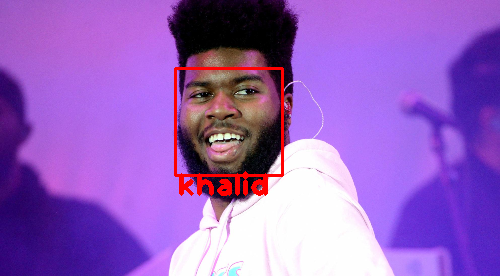

processing 1.jpg


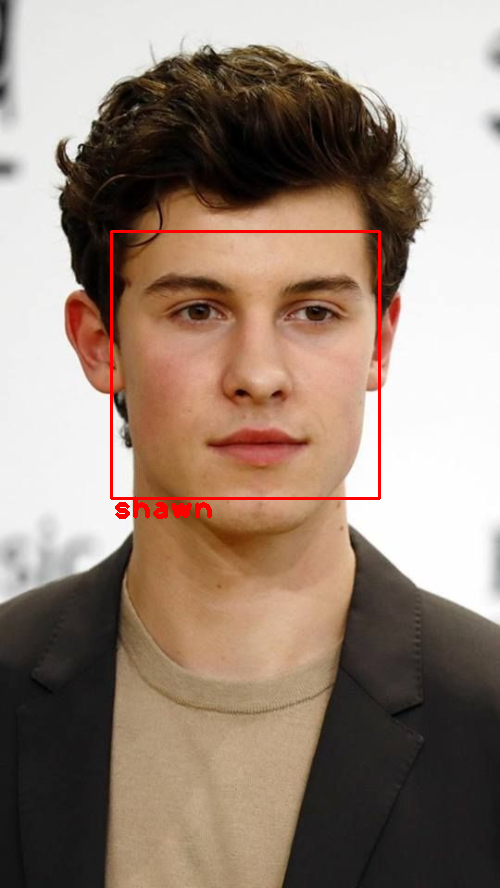

processing 2.jpg


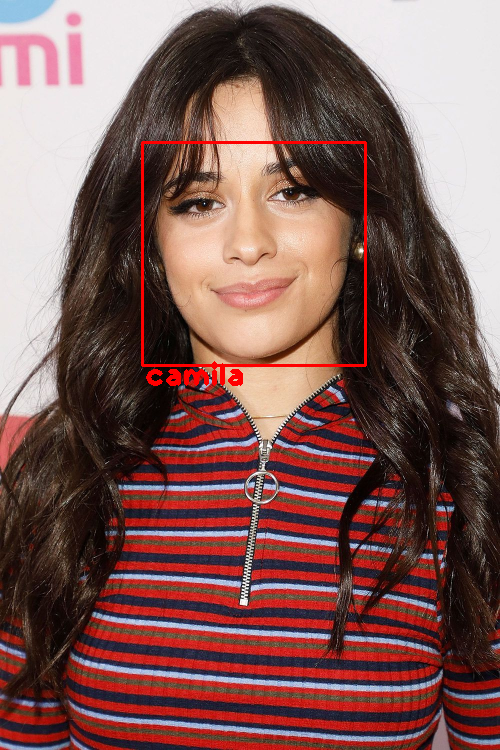

In [ ]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print('processing', file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  
  results = face_recognition.compare_faces(known_encodings, img_enc)

  for i in range(len(results)):
    if (results[i]):
      name = known_names[i]
      (t, r, b, l) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (l, t), (r, b), (0,0,255), 2)
      cv2.putText(img, name, (l+2, b+20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 3)
      cv2_imshow(img)
